# Download the latest copy of the dataset
Get the latest copy of the data from MongoDB. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from hydronet.db import HydroNetDB, HydroNetRecord
from tqdm import tqdm
import pandas as pd
import bz2

2022-03-14 18:30:08.159403: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


## Download and save in protobuf format
Ready for training a machine learning model

In [2]:
mongo = HydroNetDB.from_connection_info(port=27855)
n_docs = mongo.collection.estimated_document_count()
print(f'Connected to a database with around {n_docs} water clusters')

Connected to a database with around 4464542 water clusters


Count the number per source and by size

In [3]:
%%time
results = mongo.collection.aggregate([{'$group': {'_id': '$source', 'count': {'$count': {}}}}])

CPU times: user 157 ms, sys: 27.5 ms, total: 185 ms
Wall time: 4min 11s


In [4]:
by_source = pd.DataFrame(list(results))
by_source

,_id,count
0,wdbase,4464542


In [5]:
%%time
results = mongo.collection.aggregate([{'$group': {'_id': '$n_waters', 'count': {'$count': {}}}}])
by_water = list(results)

CPU times: user 136 ms, sys: 44.6 ms, total: 181 ms
Wall time: 4min 3s


In [6]:
by_water = pd.DataFrame(by_water).rename(columns={'_id': 'n_waters'}).sort_values('n_waters')

Text(0, 0.5, 'Count')

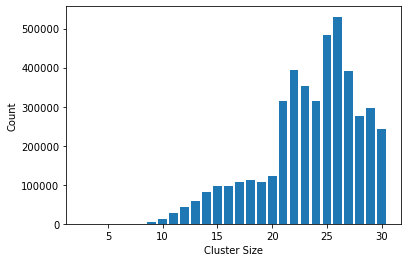

In [7]:
fig, ax = plt.subplots()

ax.bar(by_water['n_waters'], by_water['count'])

ax.set_xlabel('Cluster Size')
ax.set_ylabel('Count')

Save them

In [8]:
%%time
mongo.write_datasets('data')

CPU times: user 11min 34s, sys: 16 s, total: 11min 50s
Wall time: 1h 39min 52s


## Save the dataset in JSON format
So that we have a non-binary version of the database

In [ ]:
with bz2.open('data/full-dataset.json.bz', 'wt') as fp:
    for record in tqdm(mongo.iterate_as_records(mongo.collection.find({})), total=n_docs):
        print(record.json(), file=fp)

 13%|███████████████████████▏                                                                                                                                                        | 589289/4464542 [28:18<1:02:28, 1033.88it/s]

## 